# Differential evolution

Algorithm: https://en.wikipedia.org/wiki/Differential_evolution

Self-adaptive Differential Evolution in pygmo flavour (pDE): https://esa.github.io/pygmo2/algorithms.html#pygmo.de1220

In [1]:
import pygmo as pg
from tqdm import tqdm
from IPython.display import clear_output
from modules.plotter import print_result, plot_fitness_improvement
from modules.golomb_problem import init_simple_problem, init_medium_problem, orbital_golomb_array

# from matplotlib_inline.backend_inline import set_matplotlib_formats
# set_matplotlib_formats('jpeg')  # Configures Matplotlib to output inline plots as JPEGs, reducing the file size.

N_ITERATION = 8
VARIANTS = [i for i in range(1, 19)] # all

def get_n_iteration(n_sats: int, force_golomb : bool = False):
    if force_golomb :
        return int(n_sats * 6 * 10 * 1.5)
    return n_sats * 6 * 10 

def get_population_size(n_sats: int):
    return n_sats * 6 * 3

def optimize_and_plot(problem: pg.problem, algo: pg.algorithm):
    algo.set_verbosity(2)
    udp = problem.extract(orbital_golomb_array)
    solutions_log, fitness_log = [], []
    for _ in tqdm(range(N_ITERATION)):
        evolve = algo.evolve(
            pg.population(
                problem, 
                size=get_population_size(udp.n_sat)
                )
            )
        clear_output()
        
        solutions_log.append(evolve.champion_x)
        fitness_log.append(log[2] for log in algo.extract(pg.de1220).get_log() for _ in (0, 1)) # FIX
    average_fitness = [sum(fitness) / N_ITERATION for fitness in zip(*fitness_log)]

    plot_fitness_improvement(average_fitness)
    print_result(udp, solutions_log, show_simulated_reconstruction=True)
    return solutions_log

## Simple Problem

### Stock Problem

100%|██████████| 8/8 [06:49<00:00, 51.13s/it]


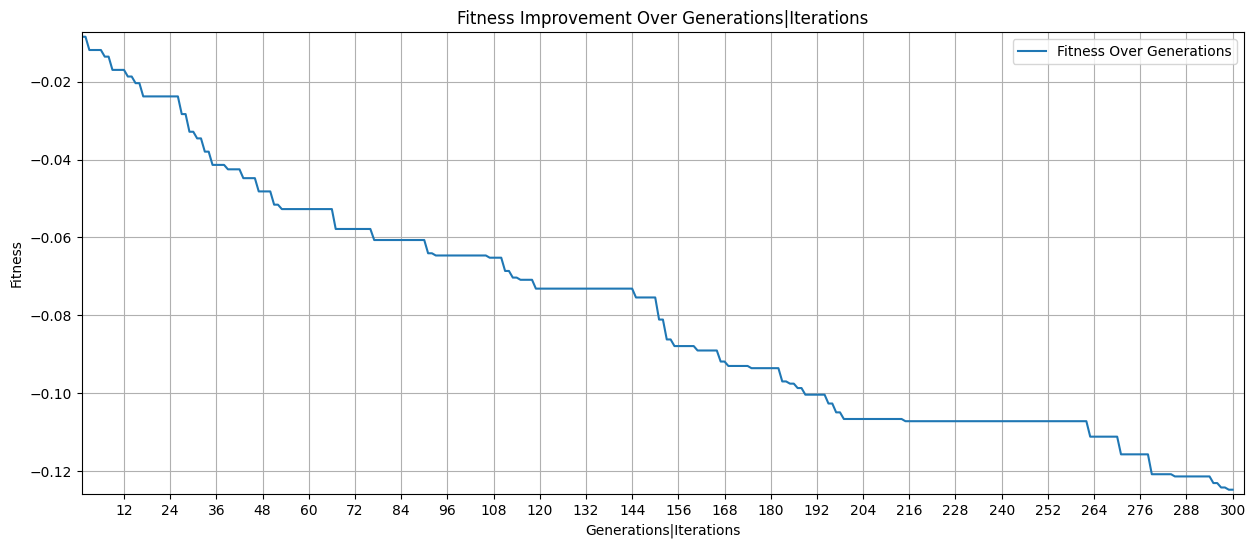

N sat:  5 	Grid size:  11
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -0.1252834	Unique Distances [%]: 35.0000	Satellites in Grid [%]: 96.1111
--- --- ---
Best solution: [ 0.01197292 -0.14597906  0.38773749 -0.27661413 -0.12338627 -0.42110594
 -0.21843227 -0.01243066 -0.2708059   0.32852506  0.1952063  -0.69780191
  0.45147685  0.64079318 -0.98003196 -0.10110635 -0.56668548  0.15838776
 -0.3058365   0.22199462  0.06214237 -0.39307226  0.97417008 -0.67186302
 -0.35505811  0.97388389  0.06737575 -0.57865824 -0.80072742 -0.92292508]
Default Fitness: -0.1428571	Unique Distances [%]: 40.0000	Satellites in Grid [%]: 100.0000


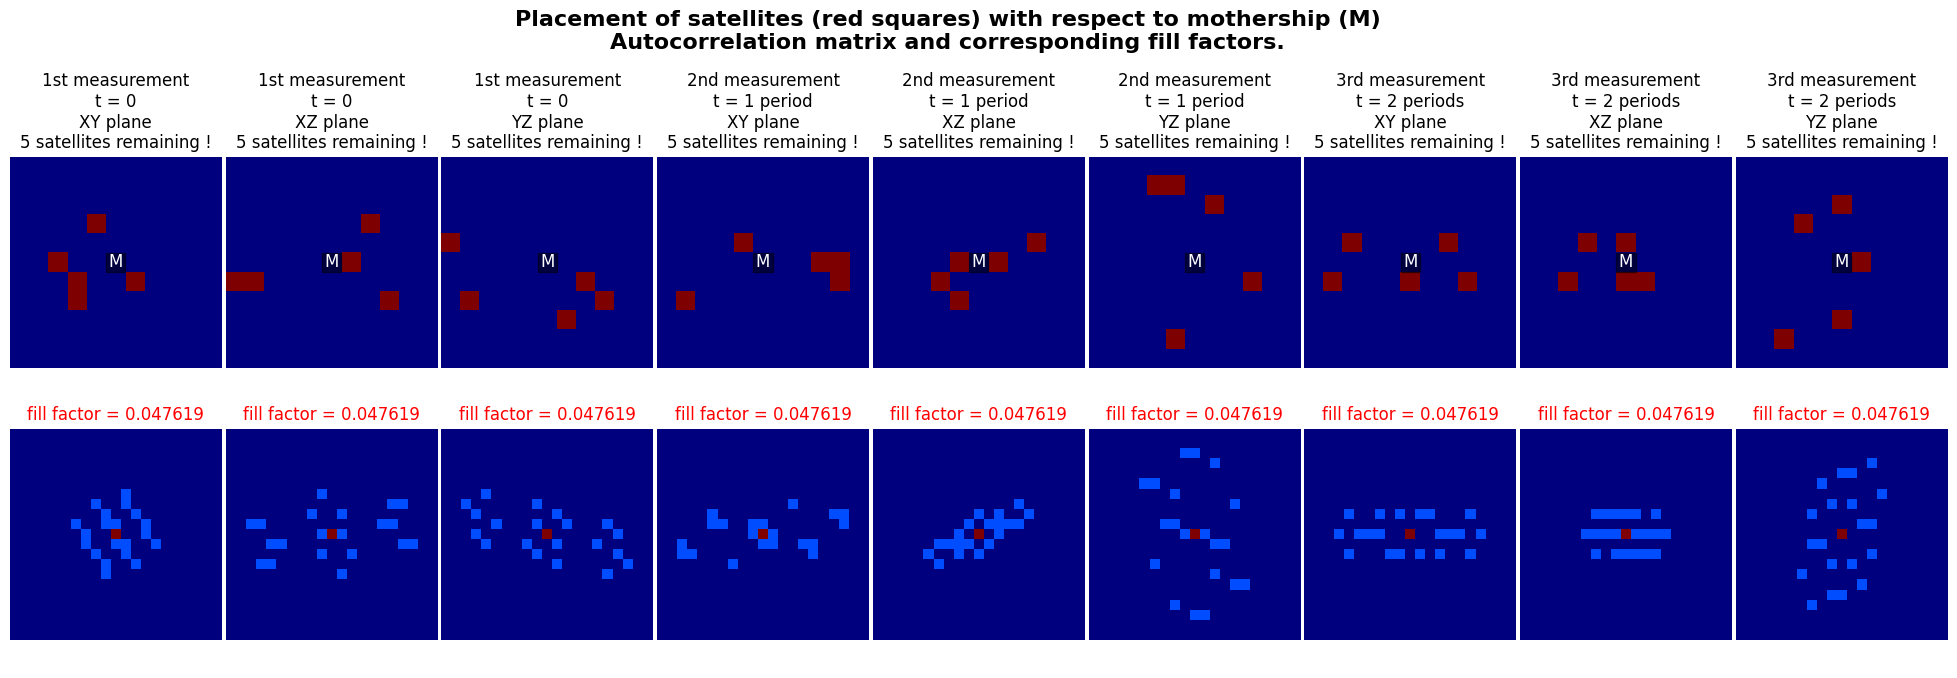

---

XY	SSIM = 14.1041%


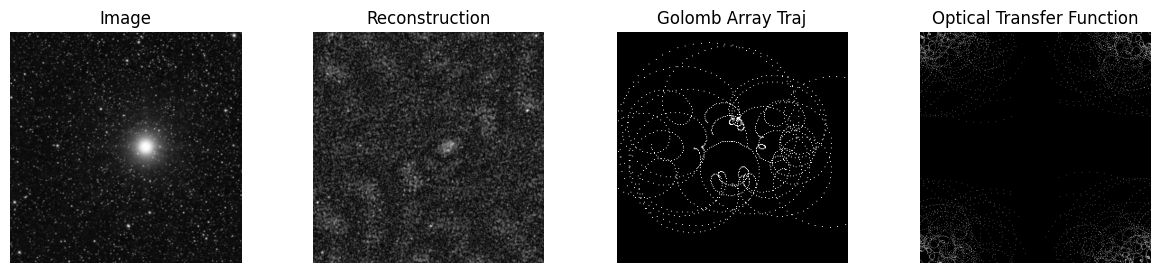

XZ	SSIM = 17.5076%


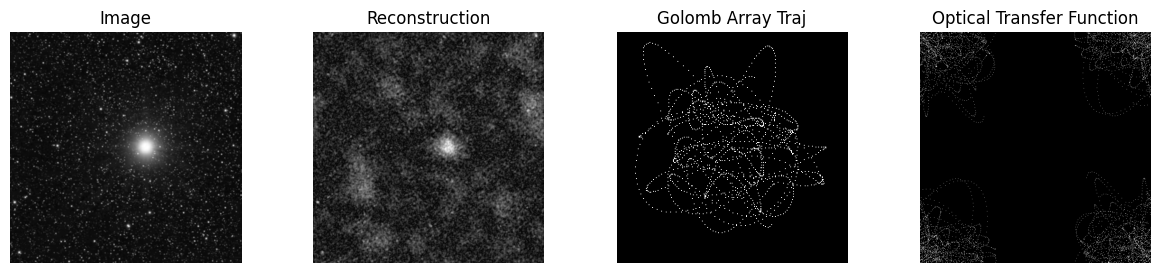

YZ	SSIM = 18.1511%


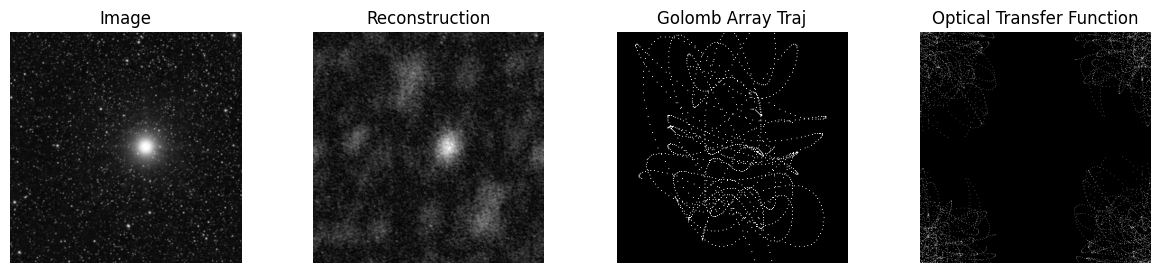

---

XY	SSIM = 13.1842%


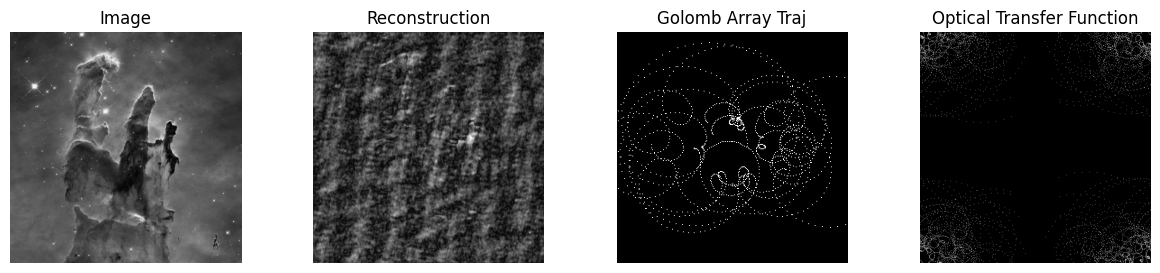

XZ	SSIM = 17.4444%


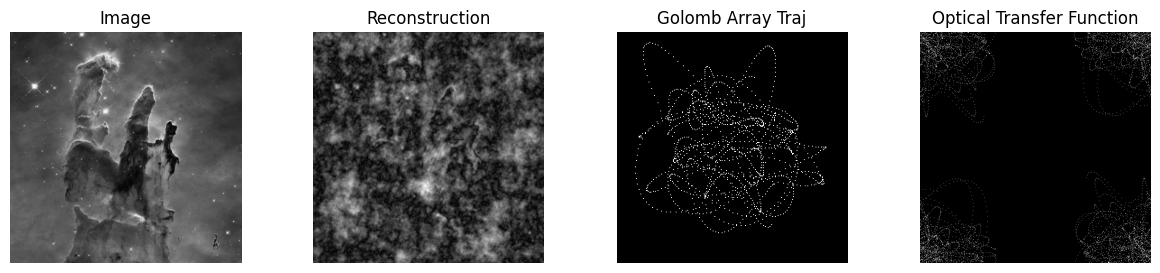

YZ	SSIM = 18.4852%


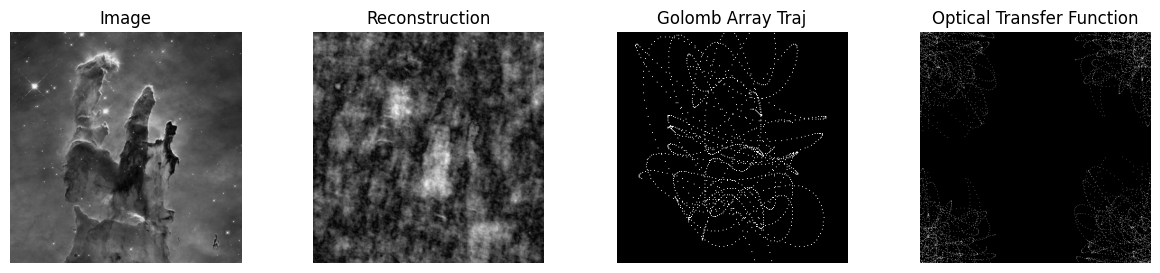

In [2]:
udp = init_simple_problem()
_ = optimize_and_plot(
    problem=pg.problem(udp),
    algo=pg.algorithm(
        pg.de1220(
            gen=get_n_iteration(udp.n_sat, False),
            allowed_variants=VARIANTS,
            variant_adptv=1,
            ftol=0,
            xtol=0,
            memory=False,
        )  
    ),
)
del udp

### Force Golomb

100%|██████████| 8/8 [11:07<00:00, 83.45s/it]


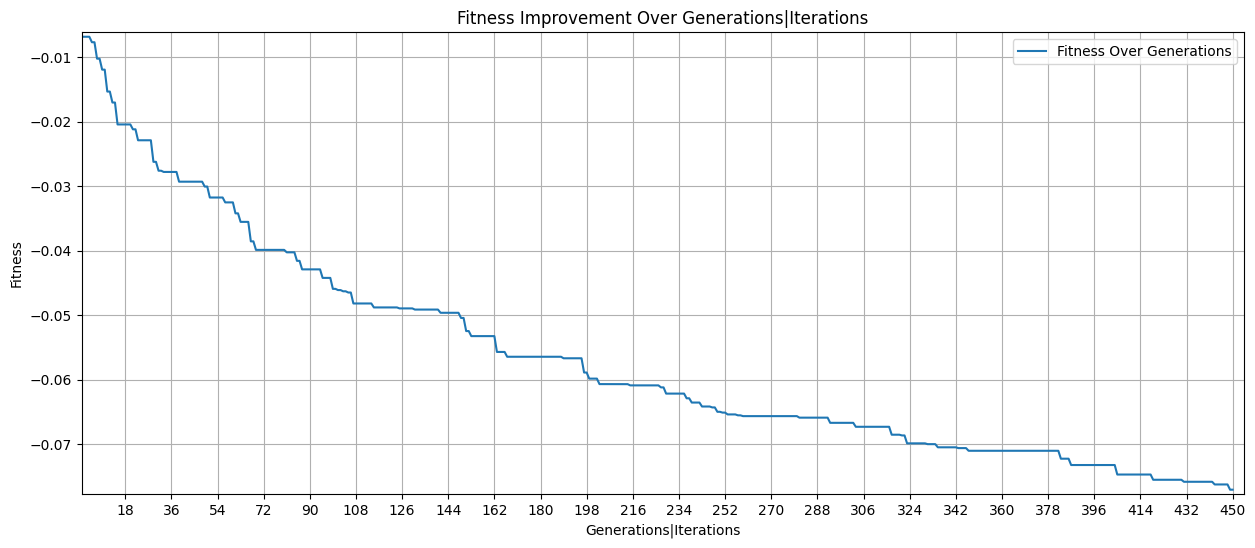

N sat:  5 	Grid size:  11
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -0.0770786	Unique Distances [%]: 58.4722	Satellites in Grid [%]: 87.5000
--- --- ---
Best solution: [ 0.01894002  0.05856732  0.34638684 -0.12364201 -0.37309823 -0.81806415
 -0.32219131 -0.13455801 -0.37706429 -0.0167202  -0.92600012  0.24863978
  0.91312135  0.1912991  -0.83667209  0.59963754 -0.13935109  0.44066971
  0.15760659 -0.75896515  0.03177627  0.17106462  0.76634836 -0.25616128
 -0.91757758  0.25629062  0.8607635  -0.41864041 -0.21372264 -0.44803394]
Default Fitness: -0.0786092	Unique Distances [%]: 55.5556	Satellites in Grid [%]: 86.6667


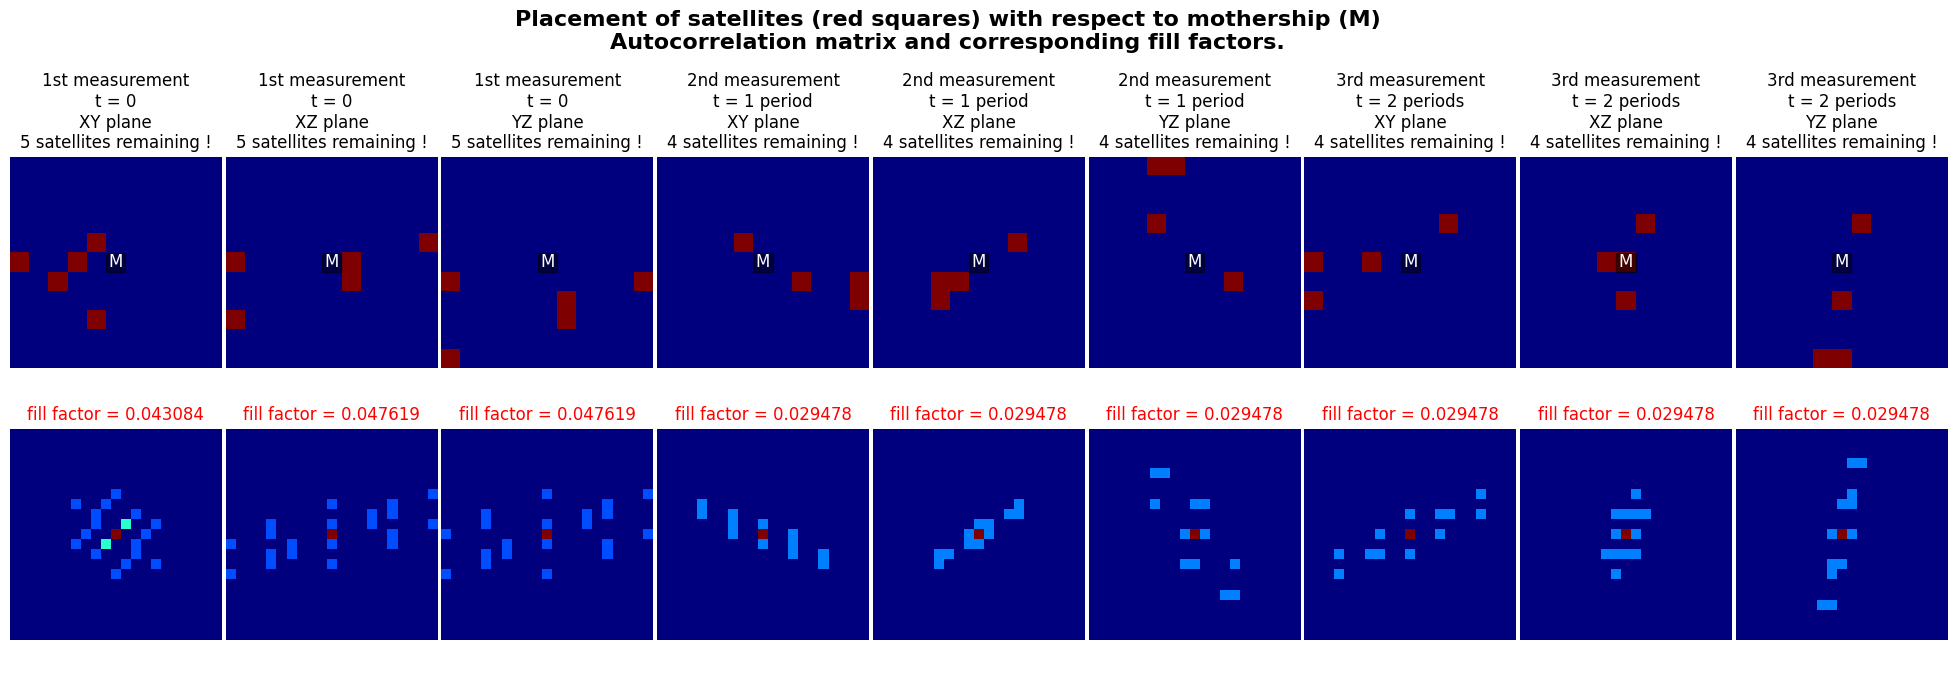

---

XY	SSIM = 13.8029%


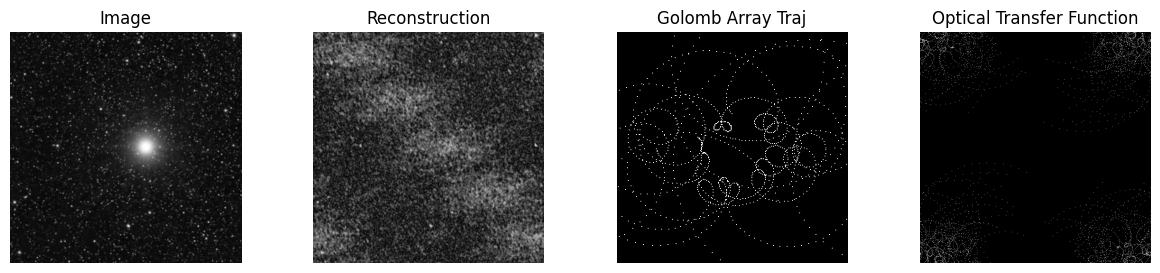

XZ	SSIM = 50.6057%


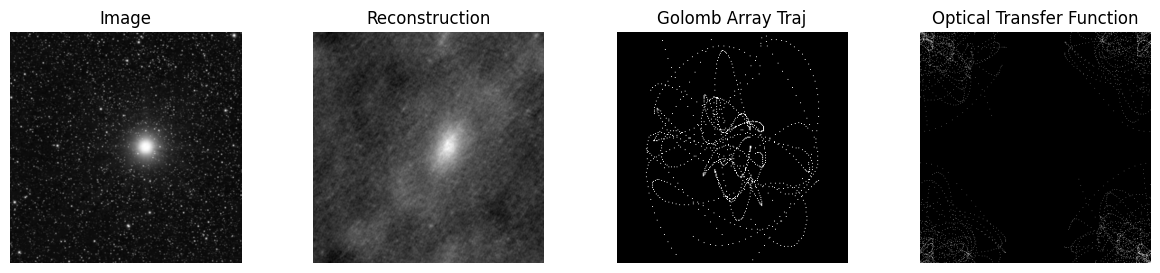

YZ	SSIM = 14.2146%


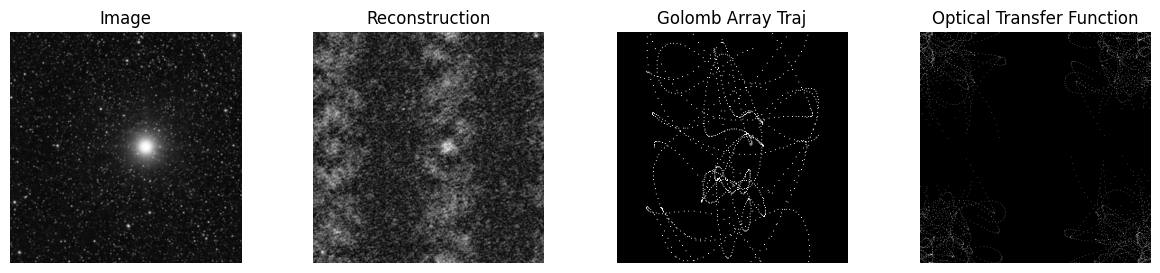

---

XY	SSIM = 13.6264%


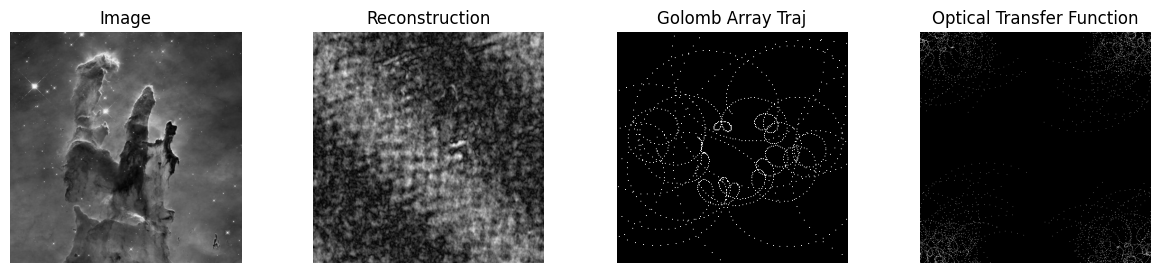

XZ	SSIM = 68.0472%


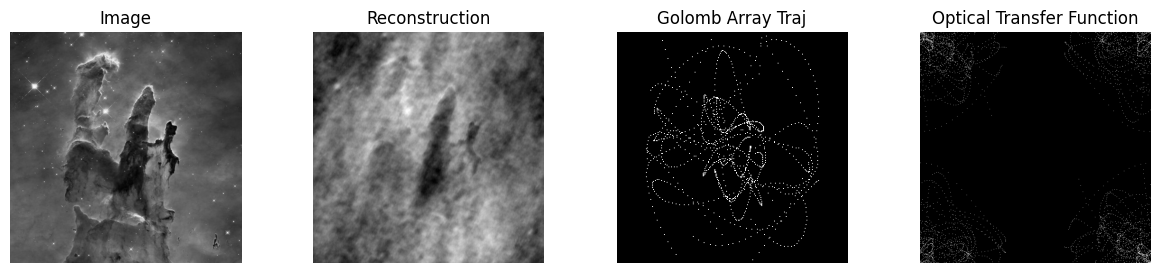

YZ	SSIM = 15.4356%


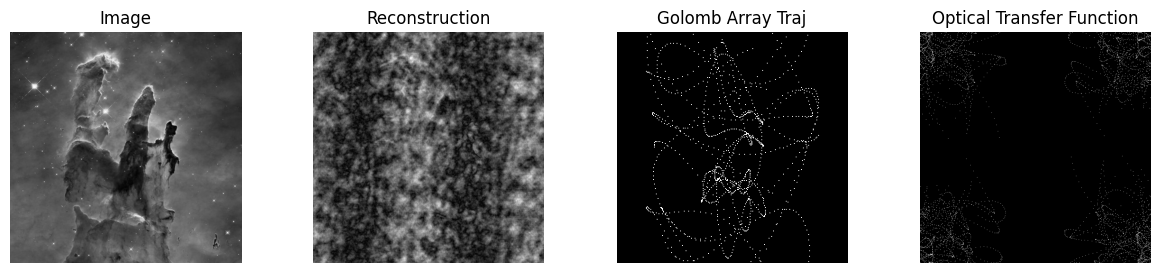

In [3]:
udp = init_simple_problem()
udp.fitness = lambda x: udp.fitness_impl(x, reduce_fill_if_not_optimal=True)  # noqa: F821

_ = optimize_and_plot(
    problem=pg.problem(udp),
    algo=pg.algorithm(
        pg.de1220(
            gen=get_n_iteration(udp.n_sat, True),
            allowed_variants=VARIANTS,
            variant_adptv=1,
            ftol=0,
            xtol=0,
            memory=False,
        )
    ),
)
del udp

## Medium Problem

100%|██████████| 8/8 [10:42:58<00:00, 4822.37s/it] 


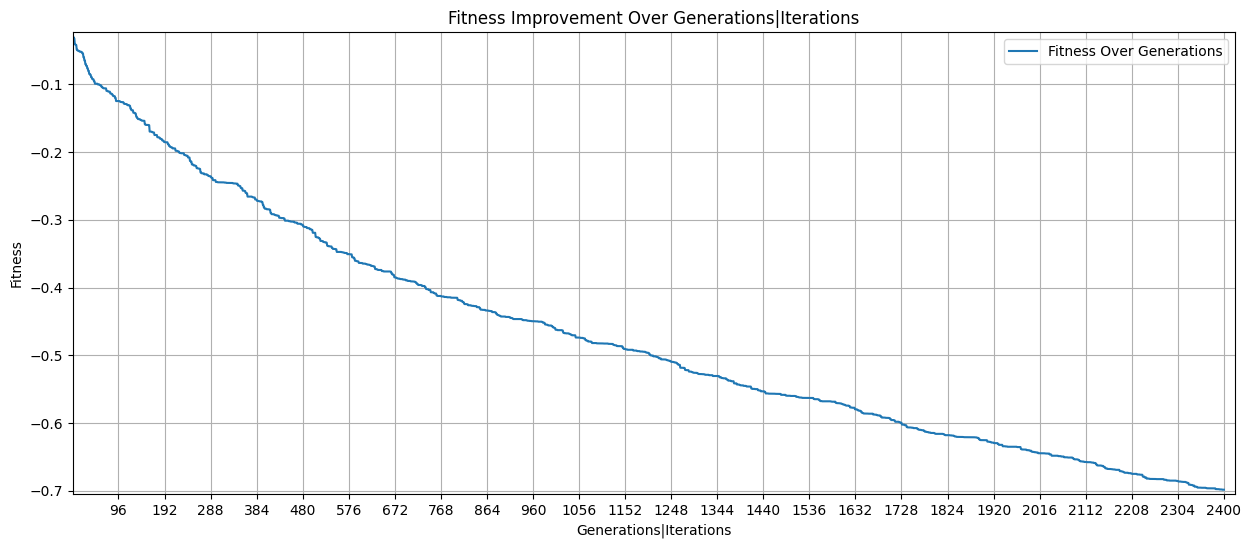

N sat:  40 	Grid size:  21
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -0.6991374	Unique Distances [%]: 0.1834	Satellites in Grid [%]: 73.2986
--- --- ---
Best solution: [ 2.43072759e-01 -8.33455155e-04  2.48222974e-01 -3.35462439e-01
 -2.20183217e-02  3.58711254e-02 -2.38157658e-02 -3.06131698e-02
 -1.49238631e-01 -8.80735989e-02 -8.39309336e-02 -1.35629443e-01
  1.70000045e-01 -5.94789511e-02  4.43427929e-02 -1.96995981e-01
  2.11837973e-01  2.65129572e-01  4.34421866e-02  2.38587508e-01
  1.08854991e-01  2.99210395e-01  1.80498354e-01 -1.36606361e-02
  2.04923255e-01 -1.84401762e-01 -1.73615449e-01 -7.44230130e-02
 -1.09646942e-01  1.25227394e-01  6.87635029e-02 -5.49505225e-02
 -5.76380675e-02  7.89316507e-01  1.17646397e-01  2.45168627e-01
 -3.61045851e-01  2.54654867e-01  2.66713367e-01  2.12389645e-02
 -1.89650471e-01  1.79817683e-01 -6.24568414e-01 -3.31770217e-02
 -1.21770629e-01  4.39702810e-01 -4.11912242e-01  4.26310607e-01
 -1.45822180e-01  1.88172765e-0

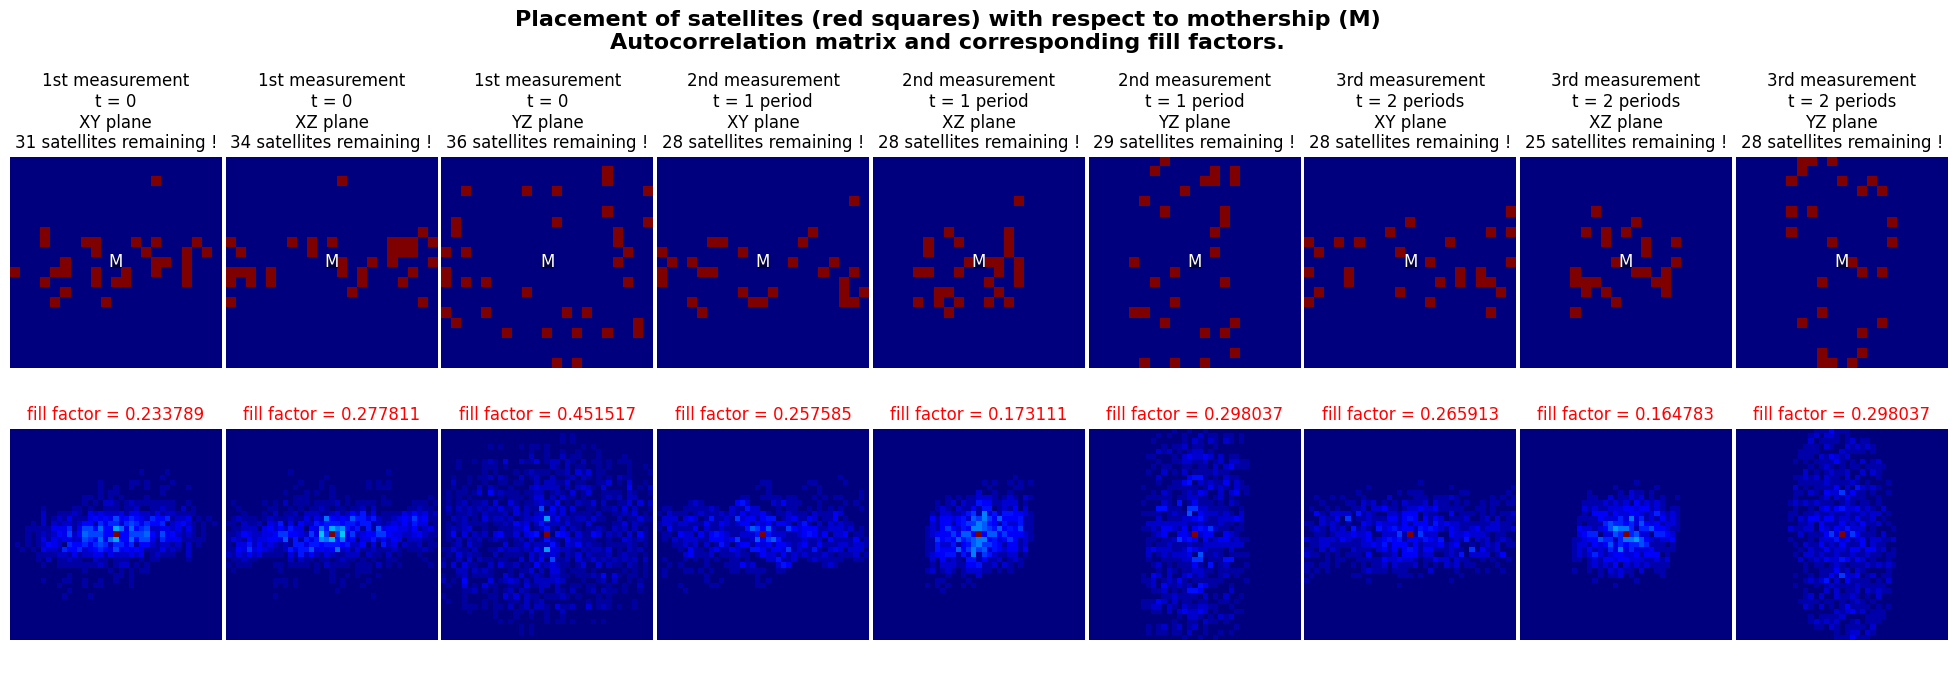

---

XY	SSIM = 95.0233%


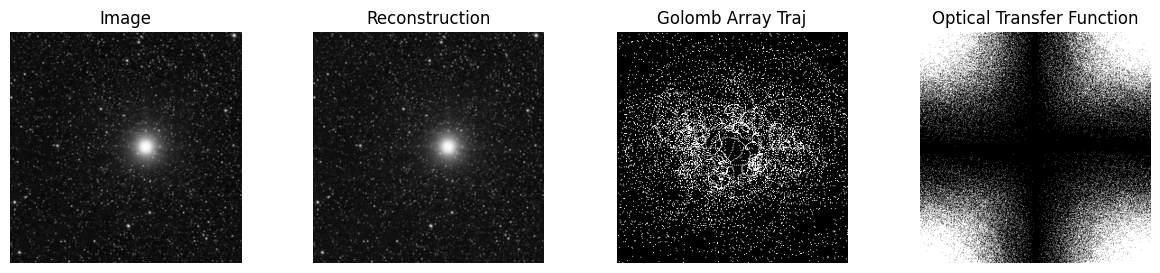

XZ	SSIM = 94.2152%


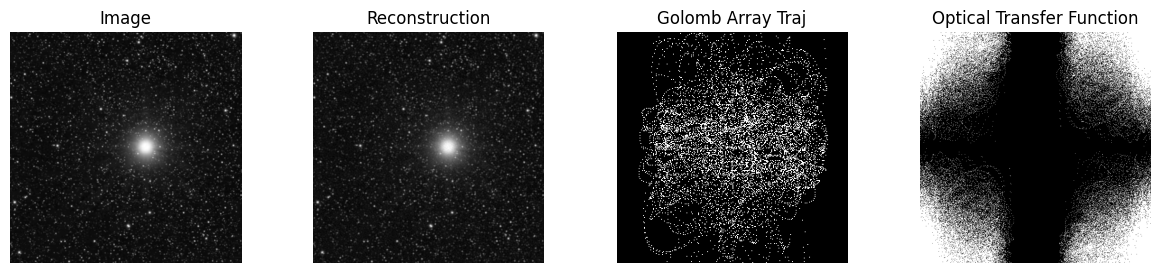

YZ	SSIM = 94.3971%


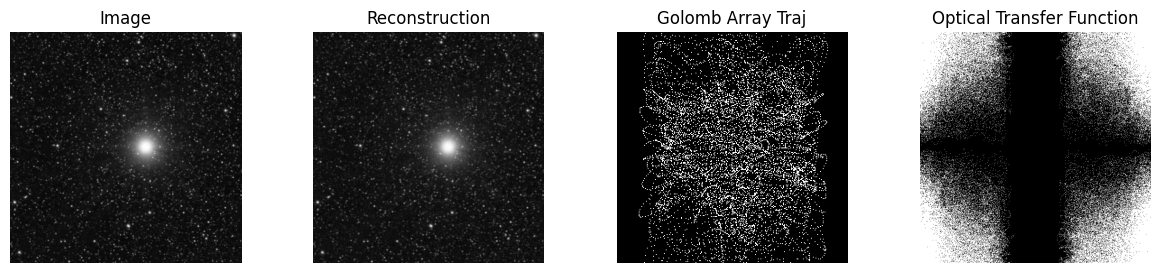

---

XY	SSIM = 95.2683%


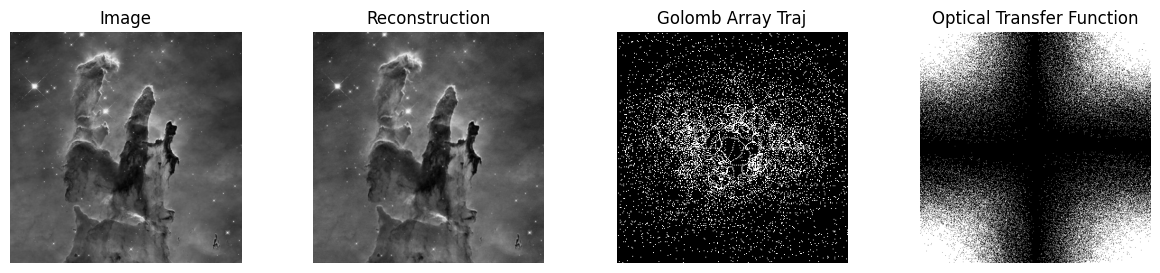

XZ	SSIM = 95.0163%


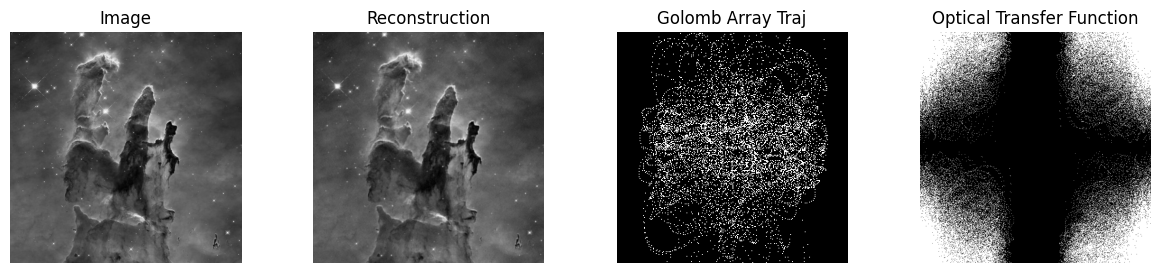

YZ	SSIM = 95.0000%


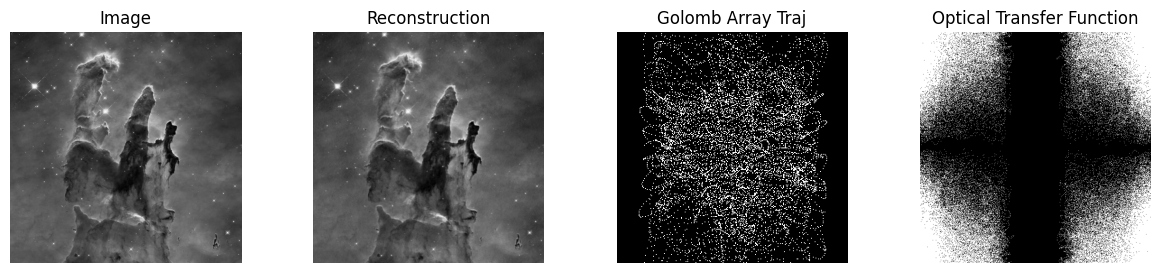

In [4]:
udp = init_medium_problem()

_ = optimize_and_plot(
    problem=pg.problem(udp),
    algo=pg.algorithm(
        pg.de1220(
            gen=get_n_iteration(udp.n_sat, False),
            allowed_variants=VARIANTS,
            variant_adptv=1,
            ftol=0,
            xtol=0,
            memory=False,
        )
    ),
)
del udp

### Force Golomb

100%|██████████| 8/8 [24:16:19<00:00, 10922.47s/it]  


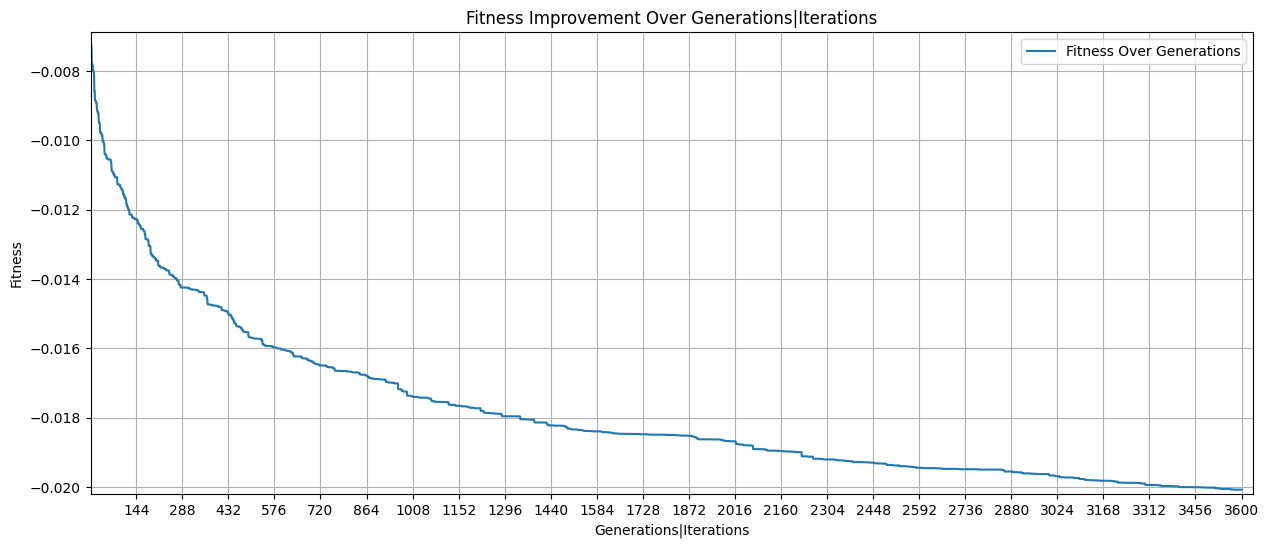

N sat:  40 	Grid size:  21
--- --- ---
**Score is mean of 8 iterations**
Default Fitness: -0.0200795	Unique Distances [%]: 0.9473	Satellites in Grid [%]: 41.1806
--- --- ---
Best solution: [-0.47219857  0.56472583 -0.07594754 -0.38514042  0.84399241  0.33398031
 -0.3819319   0.47289782 -0.54394823  0.02802447 -0.67851652  0.3100471
 -0.29714716  0.86751771  0.69465294 -0.58245683  0.88550153  0.64468673
  0.2872809  -0.65620872  0.34332566 -0.34576723  0.60763948 -0.13837104
  0.86508128  0.09631943  0.4420782  -0.26007776 -0.848536    0.23659303
  0.76700894  0.98360282  0.15309048 -0.57197775  0.45060138 -0.32573901
  0.97684859 -0.02572844 -0.7795977  -0.98461985 -0.934381    0.53766207
 -0.50277246  0.56903945 -0.10427668  0.684026    0.02768698 -0.65280998
 -0.57348525  0.10991359  0.87687231 -0.45951202  0.02737658 -0.06355635
  0.60667256 -0.07425674 -0.82520471 -0.44820901 -0.60411622 -0.30003856
  0.41062559 -0.70233481  0.25982732  0.46273033  0.89041891 -0.79739274
  0.94836

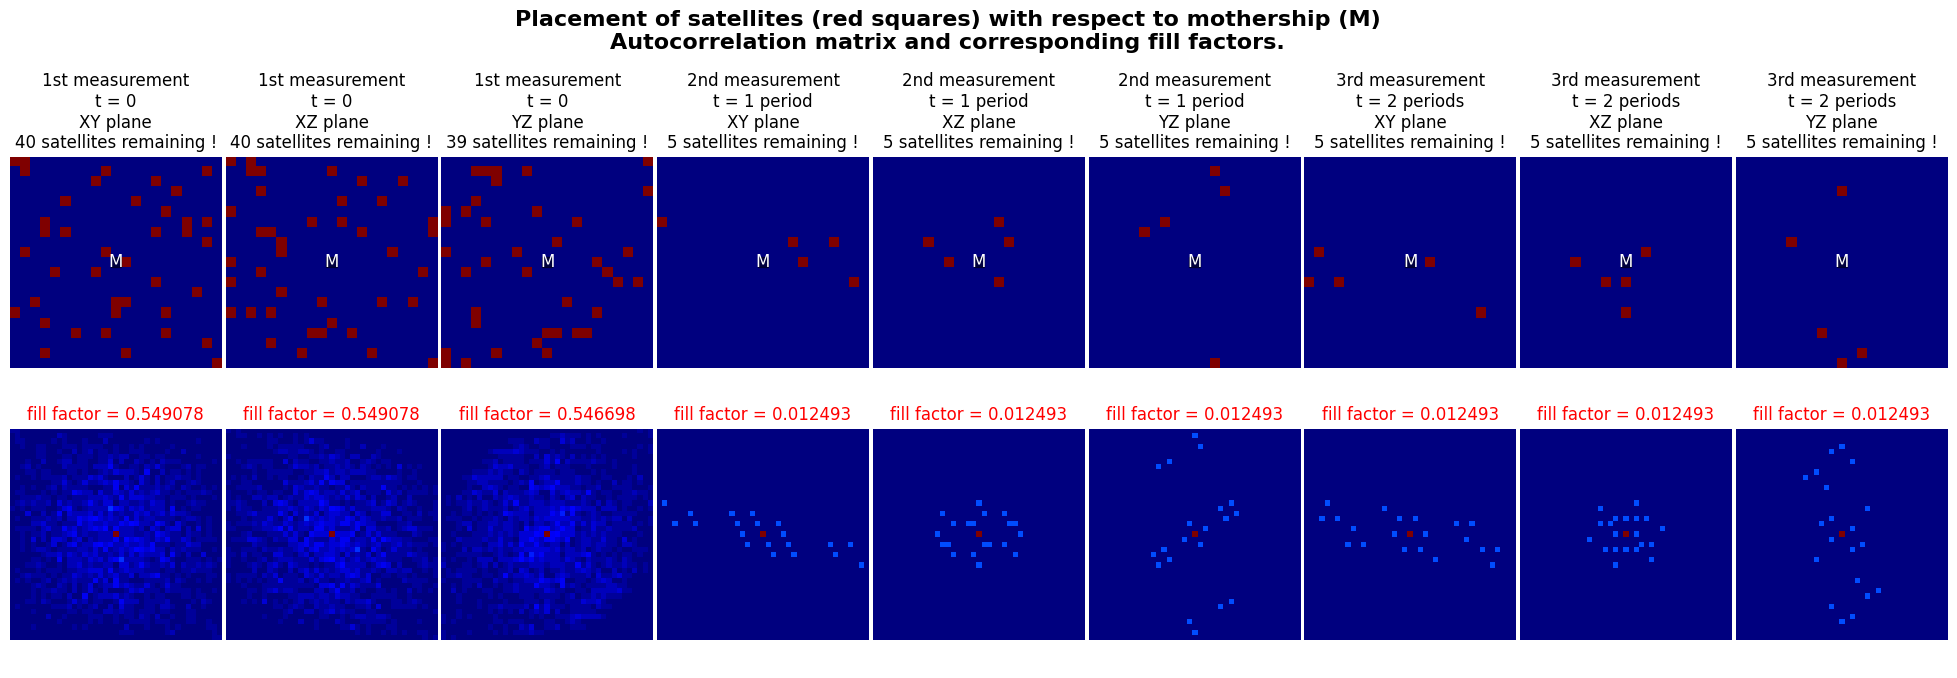

---

XY	SSIM = 26.9905%


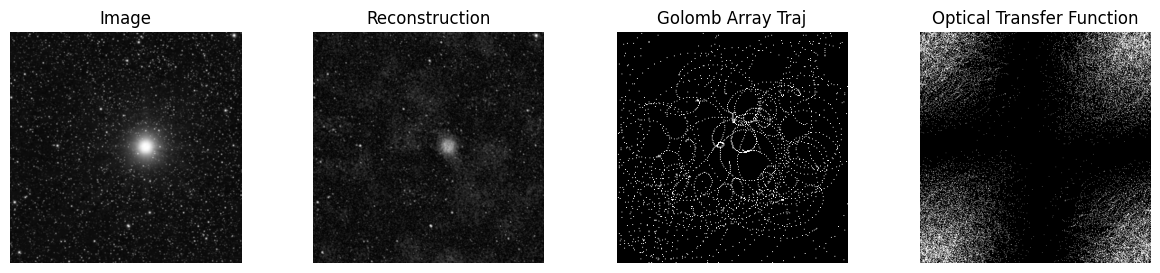

XZ	SSIM = 69.1459%


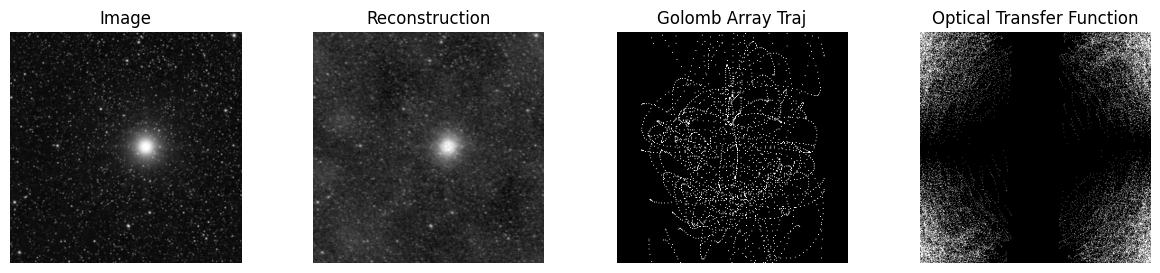

YZ	SSIM = 28.7243%


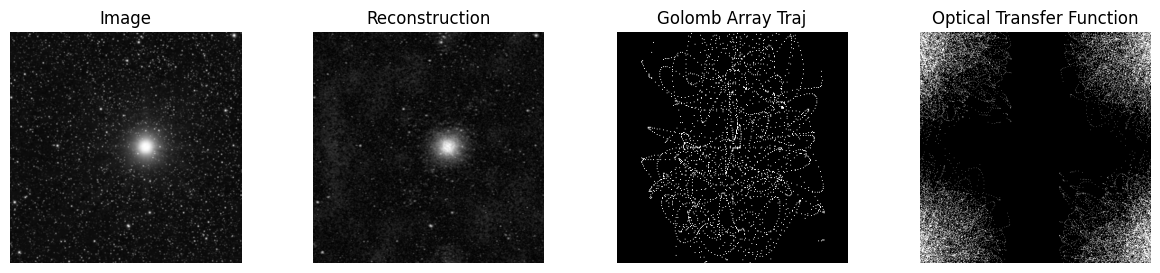

---

XY	SSIM = 19.0991%


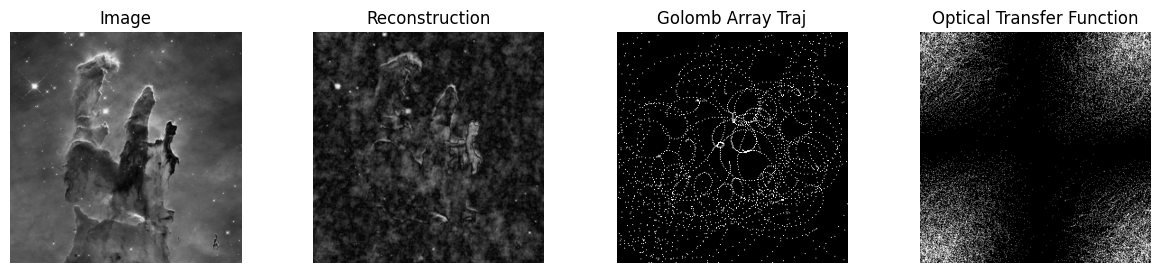

XZ	SSIM = 78.0912%


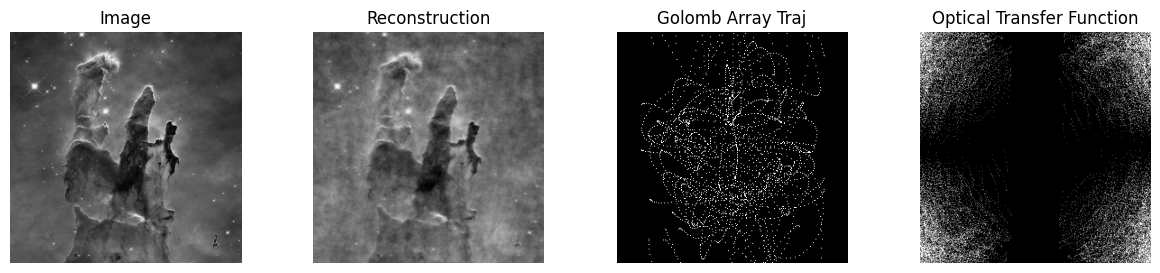

YZ	SSIM = 25.6692%


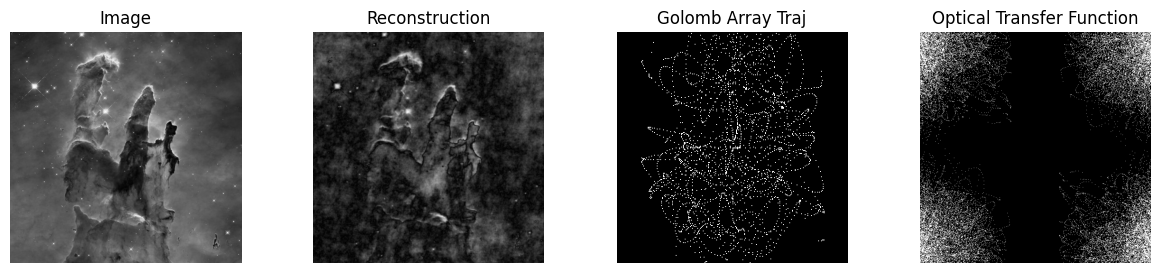

In [5]:
udp = init_medium_problem()
udp.fitness = lambda x: udp.fitness_impl(x, reduce_fill_if_not_optimal=True)  # noqa: F821

_ = optimize_and_plot(
    problem=pg.problem(udp),
    algo=pg.algorithm(
        pg.de1220(
            gen=get_n_iteration(udp.n_sat, True),
            allowed_variants=VARIANTS,
            variant_adptv=1,
            ftol=0,
            xtol=0,
            memory=False,
        )
    ),
)
del udp